# Phase 1 Project

![TakeOff](./images/take_off.jpg)

## 1.  Importing and loading data sets, initial inspection
## =========================================================================

In [1045]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

df = pd.read_csv('Data\AviationData.csv', encoding='latin-1', low_memory=False)
states_df = pd.read_csv('Data\\USState_Codes.csv')

In [1046]:
# code the state names and abbreviations into the main df
states_dict = {}
for index, row in states_df.iterrows():
    states_dict[row[1]] = row[0]
    
    
def state_lookup(abbrev):
    if abbrev in states_dict.keys():
        return states_dict[abbrev]
    else:
        return None

df['State.Name'] = df['Location']
df['State.Abbrev'] = df['Location'].map(lambda x: str(x)[-2:])
df['State.Name'] = df['State.Abbrev'].map(lambda x: state_lookup(x) if state_lookup(x) != None else x)
df['State.Name'] = df['State.Name'].map(lambda x: x if x in states_dict.values() else 'NA')


In [1047]:
df['State.Name'].value_counts().tail(25)

South Carolina    974
Iowa              910
Maryland          815
Mississippi       813
Wyoming           739
Nebraska          727
Kentucky          650
North Dakota      596
Maine             507
Connecticut       502
Hawaii            499
South Dakota      446
West Virginia     394
New Hampshire     368
Vermont           241
Rhode Island      158
American Samoa    131
Delaware          118
Puerto Rico       114
Gulf of mexico     44
Washington_DC      42
Atlantic ocean     26
Pacific ocean      17
Guam                8
Virgin Islands      6
Name: State.Name, dtype: int64

In [1048]:
# take a look at the value counts
for column in df.columns:
    print(f'Column Name: {column}')
    print(f'{df[column].value_counts()} \n')

Column Name: Event.Id
20001214X45071    3
20001212X19172    3
20220608105217    2
20001211X15768    2
20011219X02420    2
                 ..
20001212X19558    1
20001213X35237    1
20200624X54441    1
20050520X00649    1
20001213X25039    1
Name: Event.Id, Length: 87951, dtype: int64 

Column Name: Investigation.Type
Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64 

Column Name: Accident.Number
ERA22LA103    2
DCA22WA214    2
ERA22LA379    2
ERA22LA364    2
CEN22FA424    2
             ..
NYC85LA045    1
SEA84LA156    1
DEN00LA107    1
LAX82IA309    1
CEN17FA248    1
Name: Accident.Number, Length: 88863, dtype: int64 

Column Name: Event.Date
1982-05-16    25
2000-07-08    25
1984-06-30    25
1986-05-17    24
1983-06-05    24
              ..
1991-11-30     1
2001-03-26     1
2013-11-04     1
1996-02-03     1
1991-12-03     1
Name: Event.Date, Length: 14782, dtype: int64 

Column Name: Location
ANCHORAGE, AK           434
MIAMI, FL               200
ALBUQUER

## 2. Data Cleaning
## =========================================================================

In [1049]:
#Dropping these columns due to Not enough data and/or not enough relevance
drop_columns = ['Latitude',          
                'Longitude',         
                'Schedule',          
                'Air.carrier',       
                'Airport.Code',      
                'FAR.Description',   
                'Publication.Date',  
                'Report.Status',
                'Accident.Number',
                'Registration.Number'
               ]
df = df.drop(columns=drop_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Airport.Name            52790 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81812 non-null  object 
 14  Purpose.of.flight       82697 non-null

In [1050]:
#Take a look at amateur built values
df['Amateur.Built'].value_counts()


No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [1051]:
#Take a look at amateur built NaN
df['Amateur.Built'].isna().sum()

102

In [1052]:
# Stakeholders will not want to purchase airplanes built by amateurs for liability reasons
# dropping 'Amateur.Built' == 'Yes' or NaN 
df = df[(df['Amateur.Built'] == 'No') & (df['Amateur.Built'].notna())]

In [1053]:
# looking at 'Investigation.Type'
df['Investigation.Type'].value_counts()

Accident    76520
Incident     3792
Name: Investigation.Type, dtype: int64

In [1054]:
# see what the difference is in 'Investigation.Type'
df.groupby('Investigation.Type')[['Total.Fatal.Injuries', 'Total.Uninjured']].describe()

Total.Fatal.Injuries                                     \
                                  count      mean       std  min  25%  50%   
Investigation.Type                                                           
Accident                        66952.0  0.695782  5.851423  0.0  0.0  0.0   
Incident                         3203.0  0.006556  0.094941  0.0  0.0  0.0   

                               Total.Uninjured                             \
                    75%    max           count       mean        std  min   
Investigation.Type                                                          
Accident            0.0  349.0         71746.0   3.467538  20.626871  0.0   
Incident            0.0    3.0          3679.0  50.334874  83.425972  0.0   

                                           
                    25%  50%   75%    max  
Investigation.Type                         
Accident            0.0  1.0   2.0  699.0  
Incident            1.0  4.0  78.0  588.0

In [1055]:
# seems like Incident tends to be much less serious, dont want to confound the data
# dropping Incident from Investigation.Type
df = df[df['Investigation.Type'] == 'Accident']

In [1056]:
# Take a closer look at country
df['Country'].value_counts()


United States     71596
Brazil              325
Canada              301
Mexico              281
United Kingdom      209
                  ...  
Sierra Leone          1
BLOCK 651A            1
Rwanda                1
Cambodia              1
Wolseley              1
Name: Country, Length: 207, dtype: int64

In [1057]:
# Vast majority of this data set is from US crashes
# we shouldn't assume the data fits outside of US, removing non-US
df = df[df['Country'] == 'United States']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71596 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                71596 non-null  object 
 1   Investigation.Type      71596 non-null  object 
 2   Event.Date              71596 non-null  object 
 3   Location                71586 non-null  object 
 4   Country                 71596 non-null  object 
 5   Airport.Name            44652 non-null  object 
 6   Injury.Severity         71544 non-null  object 
 7   Aircraft.damage         70483 non-null  object 
 8   Aircraft.Category       24081 non-null  object 
 9   Make                    71596 non-null  object 
 10  Model                   71590 non-null  object 
 11  Amateur.Built           71596 non-null  object 
 12  Number.of.Engines       70039 non-null  float64
 13  Engine.Type             68968 non-null  object 
 14  Purpose.of.flight       69716 non-null

In [1058]:
#Take a look at Injury.Severity
df.groupby('Injury.Severity')['Total.Fatal.Injuries'].mean().head(10)

Injury.Severity
Fatal           1.784388
Fatal(1)        1.000000
Fatal(10)      10.000000
Fatal(11)      11.000000
Fatal(110)    110.000000
Fatal(111)    111.000000
Fatal(12)      12.000000
Fatal(13)      13.000000
Fatal(132)    132.000000
Fatal(135)    135.000000
Name: Total.Fatal.Injuries, dtype: float64

In [1059]:
# looks like in 'Injury.Severity', when Fatal(x), x is just = Total.Fatal.Injuries
# so recoding all Fatal(x) to just Fatal
df['Injury.Severity'] = df['Injury.Severity'].map(lambda x: 'Fatal' if str(x)[:5] == 'Fatal' else x)
df['Injury.Severity'].value_counts()

Non-Fatal      58454
Fatal          12762
Minor            181
Serious          133
Unavailable       14
Name: Injury.Severity, dtype: int64

In [1060]:
# A lot of missing data in these catagorical columns but may be relevant data,
# so recoding the NaN as 'DATA MISSING' for now
missing_data_dict = {'Airport.Name': 'DATA MISSING',
                     'Aircraft.Category': 'DATA MISSING',
                     'Broad.phase.of.flight': 'DATA MISSING',
                     'Purpose.of.flight': 'DATA MISSING'}
df = df.fillna(missing_data_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71596 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                71596 non-null  object 
 1   Investigation.Type      71596 non-null  object 
 2   Event.Date              71596 non-null  object 
 3   Location                71586 non-null  object 
 4   Country                 71596 non-null  object 
 5   Airport.Name            71596 non-null  object 
 6   Injury.Severity         71544 non-null  object 
 7   Aircraft.damage         70483 non-null  object 
 8   Aircraft.Category       71596 non-null  object 
 9   Make                    71596 non-null  object 
 10  Model                   71590 non-null  object 
 11  Amateur.Built           71596 non-null  object 
 12  Number.of.Engines       70039 non-null  float64
 13  Engine.Type             68968 non-null  object 
 14  Purpose.of.flight       71596 non-null

In [1061]:
# Take a closer look at 'Aircraft.Catagory' due to relevance
df['Aircraft.Category'].value_counts()


DATA MISSING         47515
Airplane             20564
Helicopter            2538
Glider                 472
Balloon                225
Weight-Shift           139
Powered Parachute       82
Gyrocraft               31
Ultralight              13
WSFT                     9
Blimp                    4
Powered-Lift             2
Rocket                   1
Unknown                  1
Name: Aircraft.Category, dtype: int64

In [1062]:
# Stakeholders are interested in commuter aircraft potential, and not helicopters
df = df[(df['Aircraft.Category'] == 'Airplane') | 
        (df['Aircraft.Category'] == 'DATA MISSING')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68079 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                68079 non-null  object 
 1   Investigation.Type      68079 non-null  object 
 2   Event.Date              68079 non-null  object 
 3   Location                68069 non-null  object 
 4   Country                 68079 non-null  object 
 5   Airport.Name            68079 non-null  object 
 6   Injury.Severity         68029 non-null  object 
 7   Aircraft.damage         67079 non-null  object 
 8   Aircraft.Category       68079 non-null  object 
 9   Make                    68079 non-null  object 
 10  Model                   68073 non-null  object 
 11  Amateur.Built           68079 non-null  object 
 12  Number.of.Engines       66737 non-null  float64
 13  Engine.Type             66216 non-null  object 
 14  Purpose.of.flight       68079 non-null

In [1063]:
# looking at the stats for the continuous data, for possible imputing
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,66737.000000,59444.000000,58814.000000,59348.000000,64144.000000
mean,1.132595,0.441811,0.254276,0.340517,3.056778
std,0.392511,2.650981,1.165291,1.363522,18.154499
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,265.000000,137.000000,125.000000,699.000000


In [1064]:
#imputing the median for the injuries columns, to preserve the data
missing_data_dict = {'Total.Fatal.Injuries': 0,
                     'Total.Serious.Injuries': 0,
                     'Total.Minor.Injuries': 0,
                     'Total.Uninjured': 1}
df = df.fillna(missing_data_dict)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68079 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                68079 non-null  object 
 1   Investigation.Type      68079 non-null  object 
 2   Event.Date              68079 non-null  object 
 3   Location                68069 non-null  object 
 4   Country                 68079 non-null  object 
 5   Airport.Name            68079 non-null  object 
 6   Injury.Severity         68029 non-null  object 
 7   Aircraft.damage         67079 non-null  object 
 8   Aircraft.Category       68079 non-null  object 
 9   Make                    68079 non-null  object 
 10  Model                   68073 non-null  object 
 11  Amateur.Built           68079 non-null  object 
 12  Number.of.Engines       66737 non-null  float64
 13  Engine.Type             66216 non-null  object 
 14  Purpose.of.flight       68079 non-null

In [1065]:
# check out the data chronologically
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event.Date'].dt.year.value_counts().tail(10)


2015    939
2021    915
2014    903
2020    853
1979      2
1948      1
1962      1
1974      1
1977      1
1981      1
Name: Event.Date, dtype: int64

In [1066]:
#drop the very old one-offs, questionable data
df = df[df['Event.Date'].dt.year > 1981]

In [1067]:
# cleaning up 'Make' and 'Model' to standardize catagorical values
df['Make'] = df['Make'].str.upper()
df['Model'] = df['Model'].str.replace(' ', '')

## 3. Exploratory Data Analysis
## =========================================================================

In [1068]:
# Assumption: the total number of passengers per flight = all numeric injury columns added together.
# this should give us the number of passengers on each aircraft at the time of the event.  This will
# allow us to normalize severity of each event across aircraft models even though there are widely 
# varying numbers of passengers on each plane due to differnet types of aircraft models
df['Total.Passengers'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + 
                          df['Total.Minor.Injuries'] + df['Total.Uninjured'])

#Save out the reduced file for tableau visualization
df.to_csv('Data\AviationDataReduced.csv')

In [1069]:
# Doing the main aggregation here
# ============================================================

# classify each model into a passenger capacity bin
def classify_capacity(capacity):
    if capacity > 150:
        return 'Large'
    elif capacity > 2:
        return 'Medium'
    else:
        return 'Small'

# grouping by model, Make and aggregating:
#          Total.Passengers median will give us the typical amount of passengers flying per model
#          Total.Passengers sum will give us the all-time passenger load per model
#          Total.Fatal.Injuries sum will give us the all-time fatalities per model
agg_df = df.groupby(['Model', 'Make']).agg({'Total.Passengers': ['median', 'sum'], 
                                            'Total.Fatal.Injuries': ['sum']})

# Rename the columns for clarity
agg_df.columns = ['Median.Total.Passengers', 'Sum.Total.Passengers', 'Sum.Total.Fatal.Injuries']

# Using the function above to classify each model according to passenger capacity
agg_df['Capacity.Class'] = agg_df['Median.Total.Passengers'].map(lambda x: classify_capacity(x))

# create column of percent fatalities for entire history of the model
# this will be the normalized output by which to compare models
agg_df['Percent.of.Fatalities'] = agg_df['Sum.Total.Fatal.Injuries'] / agg_df['Sum.Total.Passengers'] * 100

# want the make and model to be columns
agg_df = agg_df.reset_index()

# Create a column that contains both make and model for visualization purposes
agg_df['Make.Model'] = agg_df['Make'] + ' ' + agg_df['Model']

# order the columns for readablity
agg_df = agg_df[['Make',
                 'Model', 
                 'Make.Model',
                 'Median.Total.Passengers', 
                 'Capacity.Class', 
                 'Sum.Total.Fatal.Injuries', 
                 'Sum.Total.Passengers', 
                 'Percent.of.Fatalities']]




# filter out models that do not have high volume, want to see at least 1000 total passengers for good sample size
agg_df = agg_df[agg_df['Sum.Total.Passengers'] > 1000]

# save it out to csv for Tableau visualization
agg_df.to_csv('Data\AviationDataAggregated.csv')

# lets have a look...
agg_df.sort_values(by='Percent.of.Fatalities', ascending=False)

,Make,Model,Make.Model,Median.Total.Passengers,Capacity.Class,Sum.Total.Fatal.Injuries,Sum.Total.Passengers,Percent.of.Fatalities
5962,PIPER,PA-28-181,PIPER PA-28-181,2.0,Small,340.0,1293.0,26.295437
5955,PIPER,PA-28-180,PIPER PA-28-180,2.0,Small,260.0,1253.0,20.750200
5953,PIPER,PA-28-161,PIPER PA-28-161,2.0,Small,209.0,1144.0,18.269231
280,CESSNA,172N,CESSNA 172N,2.0,Small,389.0,2313.0,16.817985
282,CESSNA,172P,CESSNA 172P,2.0,Small,220.0,1345.0,16.356877
5944,PIPER,PA-28-140,PIPER PA-28-140,2.0,Small,300.0,1844.0,16.268980
278,CESSNA,172M,CESSNA 172M,2.0,Small,221.0,1662.0,13.297232
3658,MCDONNELL DOUGLAS,DC-9-82,MCDONNELL DOUGLAS DC-9-82,102.0,Medium,158.0,1262.0,12.519810
199,CESSNA,152,CESSNA 152,1.0,Small,361.0,3340.0,10.808383
350,CESSNA,182,CESSNA 182,2.0,Small,126.0,1214.0,10.378913


In [1070]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 173 to 5962
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Make                      36 non-null     object 
 1   Model                     36 non-null     object 
 2   Make.Model                36 non-null     object 
 3   Median.Total.Passengers   36 non-null     float64
 4   Capacity.Class            36 non-null     object 
 5   Sum.Total.Fatal.Injuries  36 non-null     float64
 6   Sum.Total.Passengers      36 non-null     float64
 7   Percent.of.Fatalities     36 non-null     float64
dtypes: float64(4), object(4)
memory usage: 2.5+ KB


In [1071]:
agg_df.describe()

,Median.Total.Passengers,Sum.Total.Fatal.Injuries,Sum.Total.Passengers,Percent.of.Fatalities
count,36.000000,36.000000,36.000000,36.000000
mean,121.000000,89.833333,1588.388889,5.454917
std,107.344971,124.574820,635.234457,7.533538
min,1.000000,0.000000,1013.000000,0.000000
25%,2.000000,0.000000,1162.000000,0.000000
50%,126.500000,2.500000,1319.000000,0.177627
75%,177.375000,170.750000,1847.500000,10.486280
max,348.000000,389.000000,3412.000000,26.295437


array([[<AxesSubplot:xlabel='Median.Total.Passengers', ylabel='Median.Total.Passengers'>,
        <AxesSubplot:xlabel='Sum.Total.Fatal.Injuries', ylabel='Median.Total.Passengers'>,
        <AxesSubplot:xlabel='Sum.Total.Passengers', ylabel='Median.Total.Passengers'>,
        <AxesSubplot:xlabel='Percent.of.Fatalities', ylabel='Median.Total.Passengers'>],
       [<AxesSubplot:xlabel='Median.Total.Passengers', ylabel='Sum.Total.Fatal.Injuries'>,
        <AxesSubplot:xlabel='Sum.Total.Fatal.Injuries', ylabel='Sum.Total.Fatal.Injuries'>,
        <AxesSubplot:xlabel='Sum.Total.Passengers', ylabel='Sum.Total.Fatal.Injuries'>,
        <AxesSubplot:xlabel='Percent.of.Fatalities', ylabel='Sum.Total.Fatal.Injuries'>],
       [<AxesSubplot:xlabel='Median.Total.Passengers', ylabel='Sum.Total.Passengers'>,
        <AxesSubplot:xlabel='Sum.Total.Fatal.Injuries', ylabel='Sum.Total.Passengers'>,
        <AxesSubplot:xlabel='Sum.Total.Passengers', ylabel='Sum.Total.Passengers'>,
        <AxesSubplot:xl

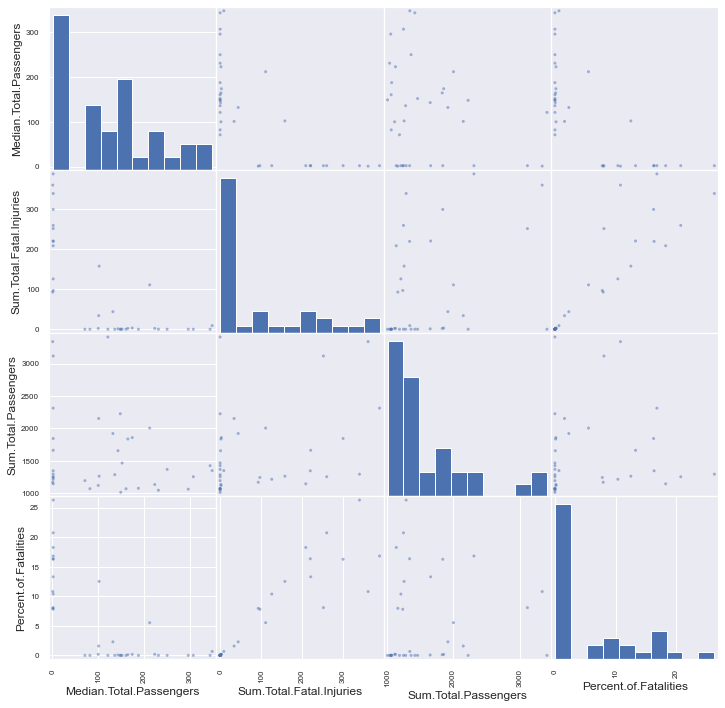

In [1072]:
pd.plotting.scatter_matrix(agg_df, figsize=(12,12))

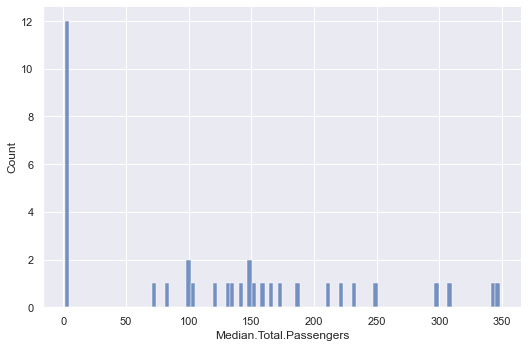

In [1073]:
# better resolution on model capacities to stear classification distribution
# big spike at 2!
graph = sns.displot(data=agg_df['Median.Total.Passengers'], bins=100, height=5, aspect=1.5)

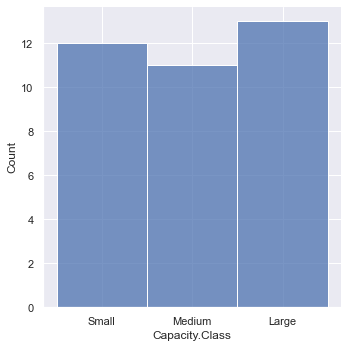

In [1074]:
# even classes based on our choices of bins for model capacity
ax = sns.displot(data=agg_df['Capacity.Class'])

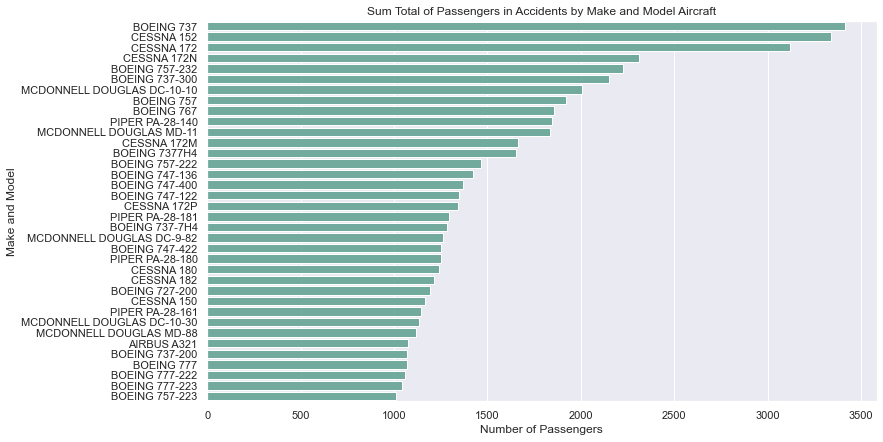

In [1075]:
# Now lets see what the total number of passengers were for each model
plt.figure(figsize=(12, 7))
agg_df = agg_df.sort_values(['Sum.Total.Passengers'], ascending=False).reset_index(drop=True)

# plot a bar chart
ax = sns.barplot(
    y='Make.Model', 
    x='Sum.Total.Passengers', 
    data=agg_df,
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2')
ax.set(xlabel='Number of Passengers', ylabel='Make and Model')  # Set the labels
plt.title('Sum Total of Passengers in Accidents by Make and Model Aircraft')  # Optional: Add a title
plt.show()

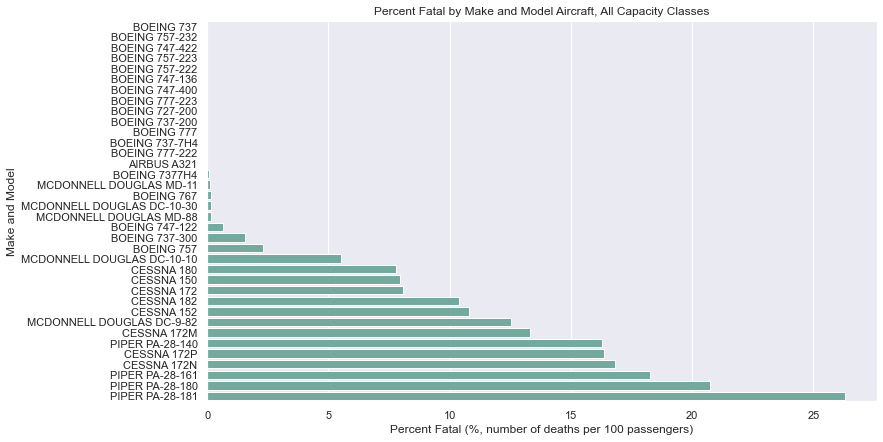

In [1085]:
# What is the percent fatal (that is, per 100 passengers how many died)
# for each model
plt.figure(figsize=(12, 7))
agg_df = agg_df.sort_values(['Percent.of.Fatalities'], ascending=True).reset_index(drop=True)

# plot a bar chart
ax = sns.barplot(
    y='Make.Model', 
    x='Percent.of.Fatalities', 
    data=agg_df,
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2')
ax.set(xlabel='Percent Fatal (%, number of deaths per 100 passengers)', ylabel='Make and Model')  # Set the labels
plt.title('Percent Fatal by Make and Model Aircraft, All Capacity Classes')  # Optional: Add a title
plt.show()

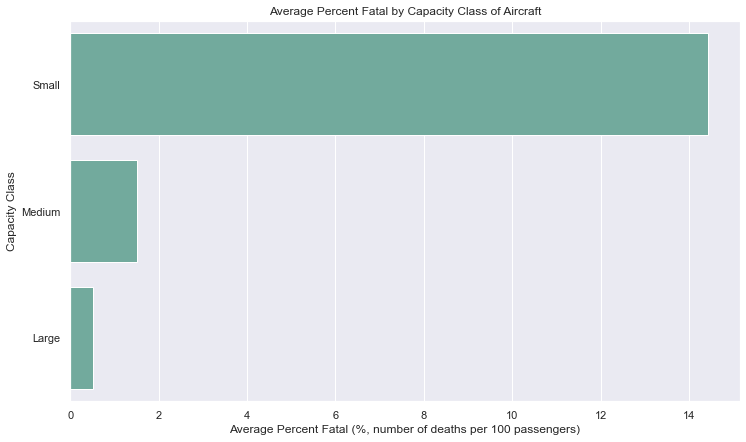

In [1087]:
# looks like the smaller planes are more dangerous, lets have a closer look
plt.figure(figsize=(12, 7))
agg_df = agg_df.sort_values(['Percent.of.Fatalities'], ascending=False).reset_index(drop=True)

# plot a bar chart
ax = sns.barplot(
    y='Capacity.Class', 
    x='Percent.of.Fatalities', 
    data=agg_df,
    estimator='mean', 
    errorbar=None, 
    color='#69b3a2')
ax.set(xlabel='Average Percent Fatal (%, number of deaths per 100 passengers)', ylabel='Capacity Class')  # Set the labels
plt.title('Average Percent Fatal by Capacity Class of Aircraft')  # Optional: Add a title
plt.show()

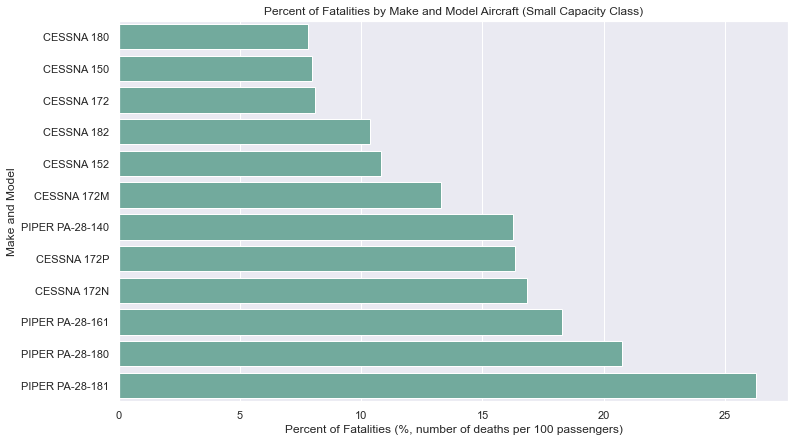

In [1078]:
# look at just the small class for percent of fatalities
plt.figure(figsize=(12, 7))
small_df = small_df.sort_values(['Percent.of.Fatalities'], ascending=True).reset_index(drop=True)

# plot a bar chart
ax = sns.barplot(
    y='Make.Model', 
    x='Percent.of.Fatalities', 
    data=small_df,
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2')
ax.set(xlabel='Percent of Fatalities (%, number of deaths per 100 passengers)', ylabel='Make and Model')  # Set the labels
plt.title('Percent of Fatalities by Make and Model Aircraft (Small Capacity Class)')  # Optional: Add a title
plt.show()

In [1079]:
# Recommend the top 5 safest small class based on Percent of Fatalities
small_df = agg_df[agg_df['Capacity.Class'] == 'Small']
small_df.sort_values(by='Percent.of.Fatalities', ascending=True).head(5)

,Make,Model,Make.Model,Median.Total.Passengers,Capacity.Class,Sum.Total.Fatal.Injuries,Sum.Total.Passengers,Percent.of.Fatalities
12,CESSNA,180,CESSNA 180,2.0,Small,97.0,1242.0,7.809984
11,CESSNA,150,CESSNA 150,1.0,Small,93.0,1168.0,7.962329
10,CESSNA,172,CESSNA 172,2.0,Small,252.0,3118.0,8.082104
9,CESSNA,182,CESSNA 182,2.0,Small,126.0,1214.0,10.378913
8,CESSNA,152,CESSNA 152,1.0,Small,361.0,3340.0,10.808383


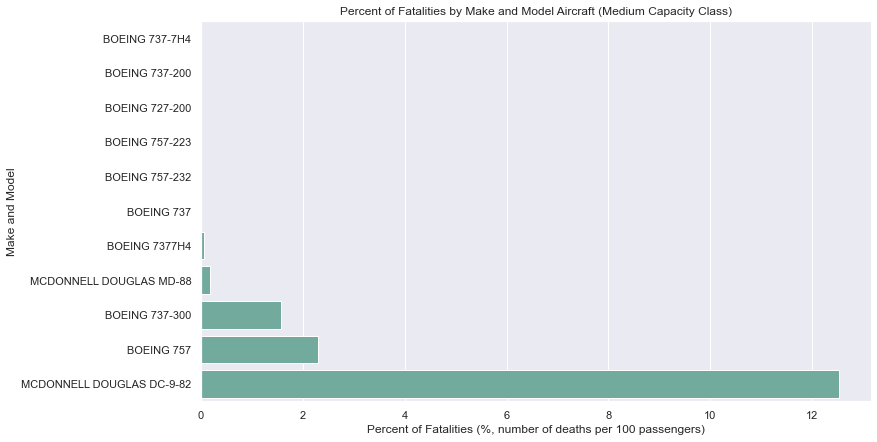

In [1080]:
# look at just the medium class for percent of fatalities
plt.figure(figsize=(12, 7))
medium_df = medium_df.sort_values(['Percent.of.Fatalities'], ascending=True).reset_index(drop=True)

# plot a bar chart
ax = sns.barplot(
    y='Make.Model', 
    x='Percent.of.Fatalities', 
    data=medium_df,
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2')
ax.set(xlabel='Percent of Fatalities (%, number of deaths per 100 passengers)', ylabel='Make and Model')  # Set the labels
plt.title('Percent of Fatalities by Make and Model Aircraft (Medium Capacity Class)')  # Optional: Add a title
plt.show()

In [1081]:
# Recommend the top 5 safest medium class based on Percent of Fatalities
medium_df = agg_df[agg_df['Capacity.Class'] == 'Medium']
medium_df.sort_values(by='Percent.of.Fatalities', ascending=True).head(5)

,Make,Model,Make.Model,Median.Total.Passengers,Capacity.Class,Sum.Total.Fatal.Injuries,Sum.Total.Passengers,Percent.of.Fatalities
23,BOEING,737-7H4,BOEING 737-7H4,136.0,Medium,0.0,1285.0,0.0
25,BOEING,737-200,BOEING 737-200,82.0,Medium,0.0,1069.0,0.0
27,BOEING,727-200,BOEING 727-200,71.0,Medium,0.0,1193.0,0.0
33,BOEING,757-223,BOEING 757-223,149.0,Medium,0.0,1013.0,0.0
34,BOEING,757-232,BOEING 757-232,148.0,Medium,0.0,2226.0,0.0


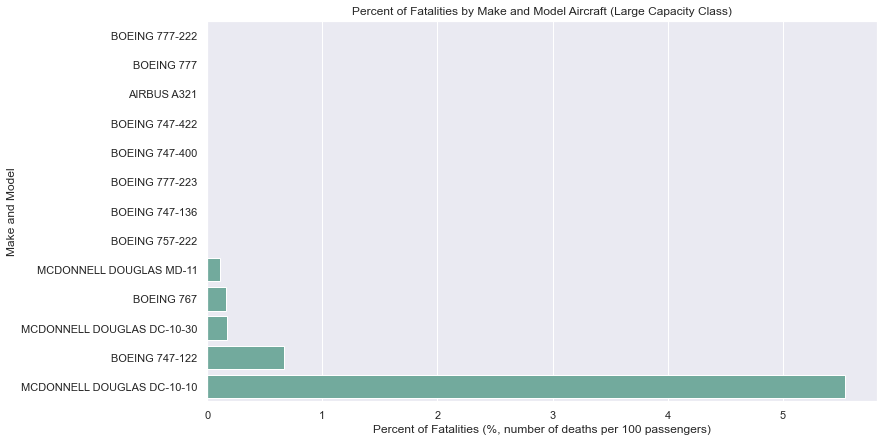

In [1082]:
# look at just the large class for percent of fatalities
plt.figure(figsize=(12, 7))
large_df = large_df.sort_values(['Percent.of.Fatalities'], ascending=True).reset_index(drop=True)

# plot a bar chart
ax = sns.barplot(
    y='Make.Model', 
    x='Percent.of.Fatalities', 
    data=large_df,
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2')
ax.set(xlabel='Percent of Fatalities (%, number of deaths per 100 passengers)', ylabel='Make and Model')  # Set the labels
plt.title('Percent of Fatalities by Make and Model Aircraft (Large Capacity Class)')  # Optional: Add a title
plt.show()

In [1083]:
# Recommend the top 5 large small class based on Percent of Fatalities
large_df = agg_df[agg_df['Capacity.Class'] == 'Large']
large_df.sort_values(by='Percent.of.Fatalities', ascending=True).head(5)

,Make,Model,Make.Model,Median.Total.Passengers,Capacity.Class,Sum.Total.Fatal.Injuries,Sum.Total.Passengers,Percent.of.Fatalities
22,BOEING,777-222,BOEING 777-222,296.0,Large,0.0,1061.0,0.0
24,BOEING,777,BOEING 777,160.5,Large,0.0,1068.0,0.0
26,AIRBUS,A321,AIRBUS A321,187.5,Large,0.0,1075.0,0.0
28,BOEING,747-422,BOEING 747-422,307.0,Large,0.0,1253.0,0.0
29,BOEING,747-400,BOEING 747-400,250.0,Large,0.0,1367.0,0.0
